In [1]:
from pathlib import Path

In [2]:
path = Path("/home/sake/userdata/latent_score_dataset/crop_resized")

In [4]:
img_paths = list(path.glob("*.png"))
len(img_paths)

In [6]:
import numpy as np
from PIL import Image
from tqdm import tqdm

heights = []
for img_path in tqdm(img_paths, desc="Getting image heights"):
  img = Image.open(img_path)
  heights.append(img.height)

heights = np.array(heights)
print(f"Min height: {heights.min()}")
print(f"Max height: {heights.max()}")
print(f"Mean height: {heights.mean():.2f}")
print(f"Median height: {np.median(heights)}")
print(f"Std height: {heights.std():.2f}")



Getting image heights: 100%|██████████| 10344/10344 [00:01<00:00, 6119.34it/s]

Min height: 16
Max height: 4104
Mean height: 149.73
Median height: 113.0
Std height: 88.17


In [16]:
# Count images with height < 70
small_images = heights[heights < 70]
print(f"Number of images with height < 70: {len(small_images)}")
print(f"Percentage: {(len(small_images) / len(heights)) * 100:.2f}%")


Number of images with height < 70: 485
Percentage: 4.69%


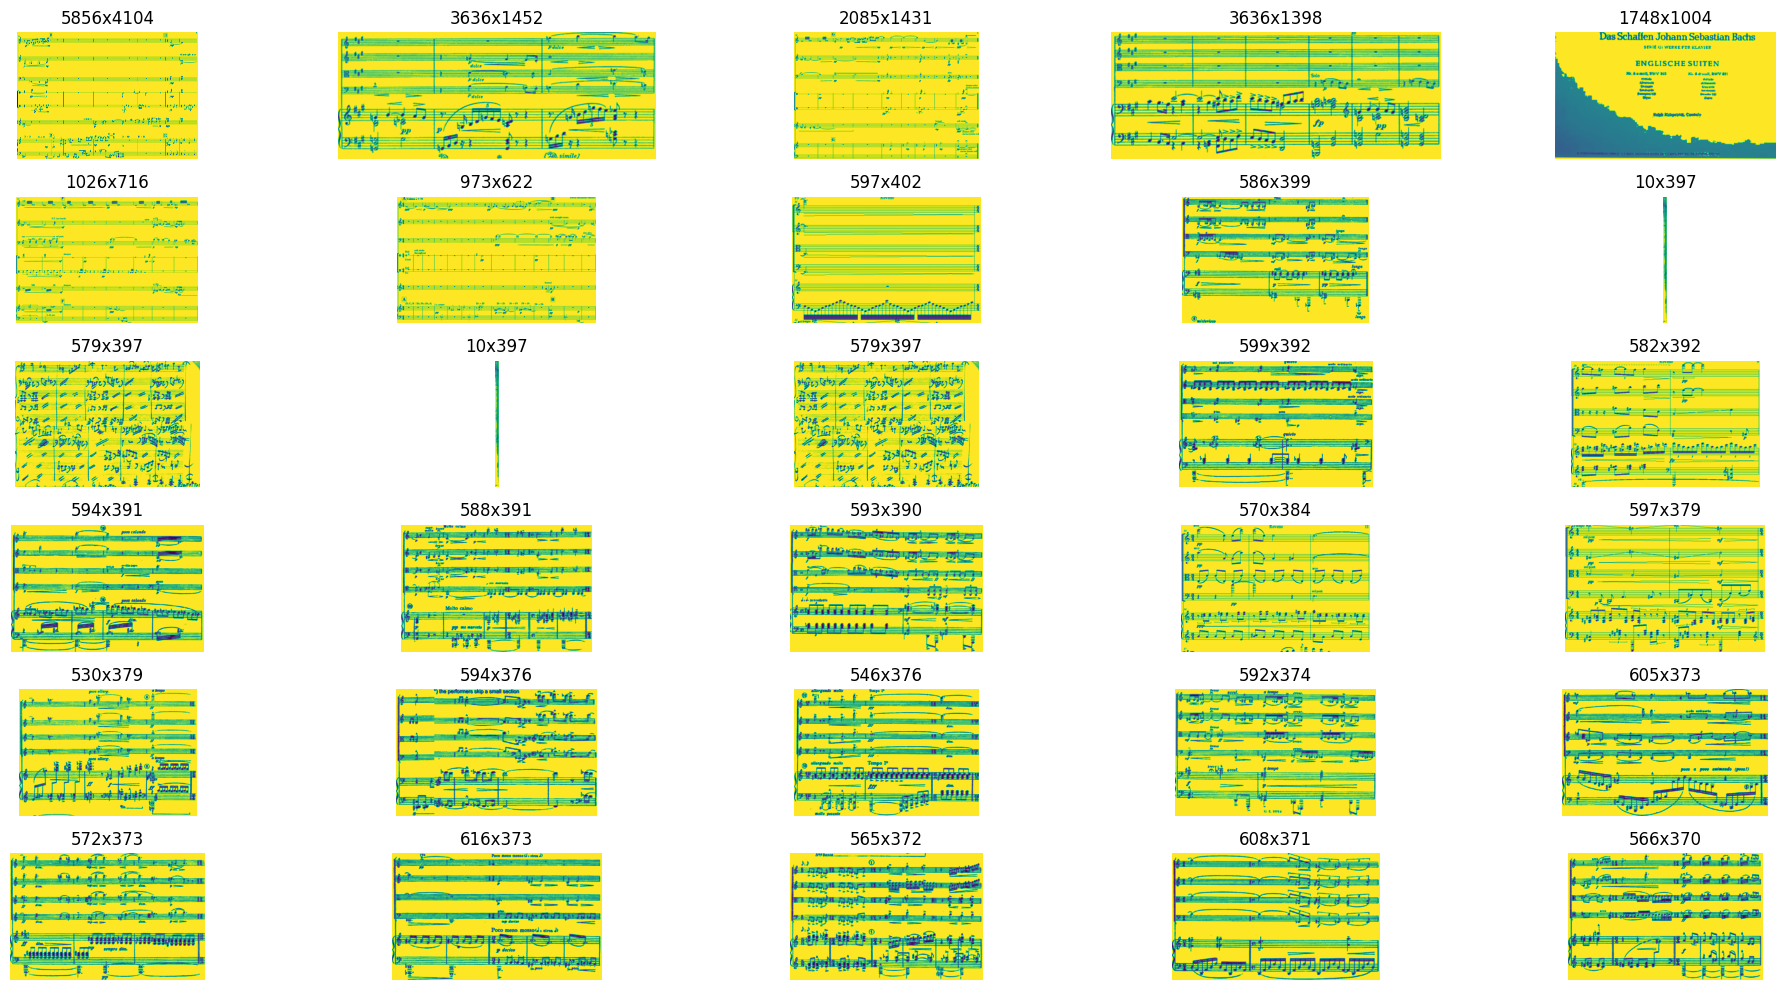

In [26]:
# Sort images by height
height_dict = {str(p): h for p, h in zip(img_paths, heights)}
sorted_paths = sorted(height_dict.keys(), key=lambda x: height_dict[x], reverse=True)

# Take top 20 images
top_20_paths = sorted_paths[:30]

# Create figure to display images
fig = plt.figure(figsize=(20, 10))
for i, img_path in enumerate(top_20_paths, 1):
  img = Image.open(img_path)
  plt.subplot(6, 5, i)
  plt.imshow(img)
  plt.title(f"{img.width}x{img.height}")
  plt.axis('off')

plt.tight_layout()
plt.show()


Finding portrait images: 100%|██████████| 10344/10344 [00:01<00:00, 8390.63it/s]


Number of portrait images: 1179
Percentage of total: 11.40%


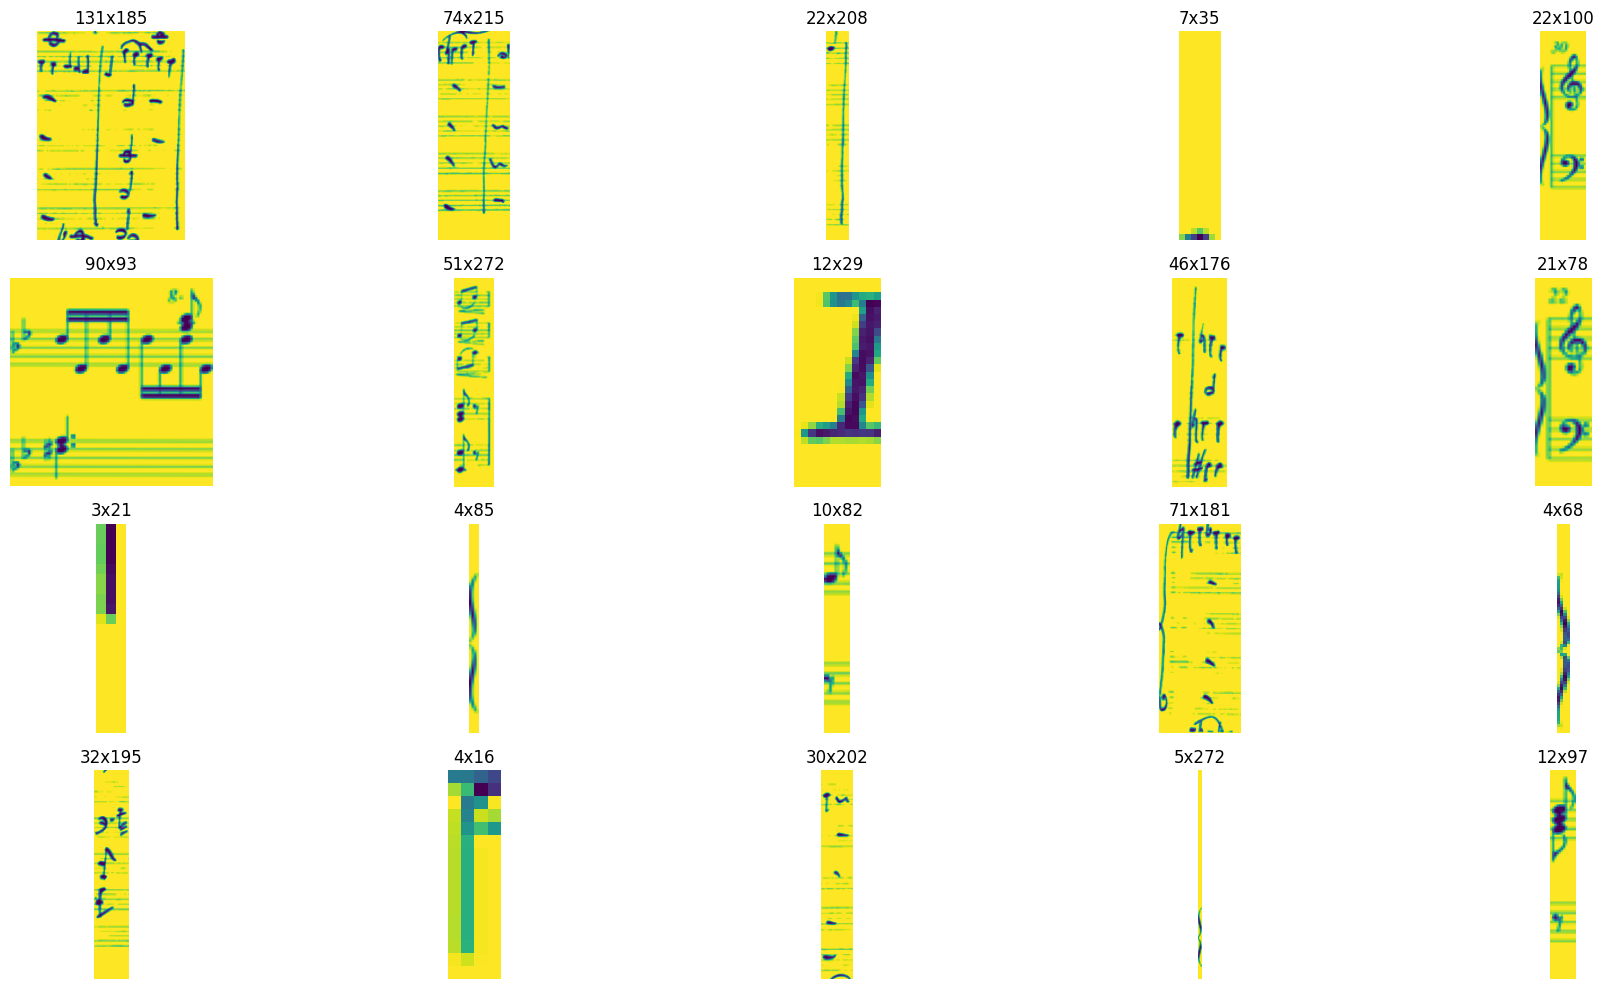

In [18]:
import matplotlib.pyplot as plt

# Find images where width < height
portrait_images = []
for img_path in tqdm(img_paths, desc="Finding portrait images"):
  img = Image.open(img_path)
  if img.width < img.height:
    portrait_images.append(img_path)

# Print statistics
print(f"Number of portrait images: {len(portrait_images)}")
print(f"Percentage of total: {(len(portrait_images) / len(img_paths)) * 100:.2f}%")

# Take first 20 portrait images
portrait_paths = portrait_images[:20]

# Create figure to display images
fig = plt.figure(figsize=(20, 10))
for i, img_path in enumerate(portrait_paths, 1):
  img = Image.open(img_path)
  plt.subplot(4, 5, i)
  plt.imshow(img)
  plt.title(f"{img.width}x{img.height}")
  plt.axis('off')

plt.tight_layout()
plt.show()


In [28]:
# Find images that are horizontal and have height between 70-390px
filtered_images = []
for img_path in tqdm(img_paths, desc="Finding small horizontal images"):
  img = Image.open(img_path)
  if 70 <= img.height < 390 and img.width > img.height:
    filtered_images.append(img_path)

print(f"Number of filtered images: {len(filtered_images)}")
print(f"Percentage of total: {(len(filtered_images) / len(img_paths)) * 100:.2f}%")

# Split into train/test sets (90/10 split)
num_train = int(len(filtered_images) * 0.9)
train_paths = filtered_images[:num_train]
test_paths = filtered_images[num_train:]

# Save train paths
with open('train.txt', 'w') as f:
  for path in train_paths:
    f.write(f"{path}\n")

# Save test paths  
with open('test.txt', 'w') as f:
  for path in test_paths:
    f.write(f"{path}\n")

print(f"Saved {len(train_paths)} paths to train.txt")
print(f"Saved {len(test_paths)} paths to test.txt")


Finding small horizontal images: 100%|██████████| 10344/10344 [00:01<00:00, 8661.07it/s]

Number of filtered images: 8802
Percentage of total: 85.09%
Saved 7921 paths to train.txt
Saved 881 paths to test.txt


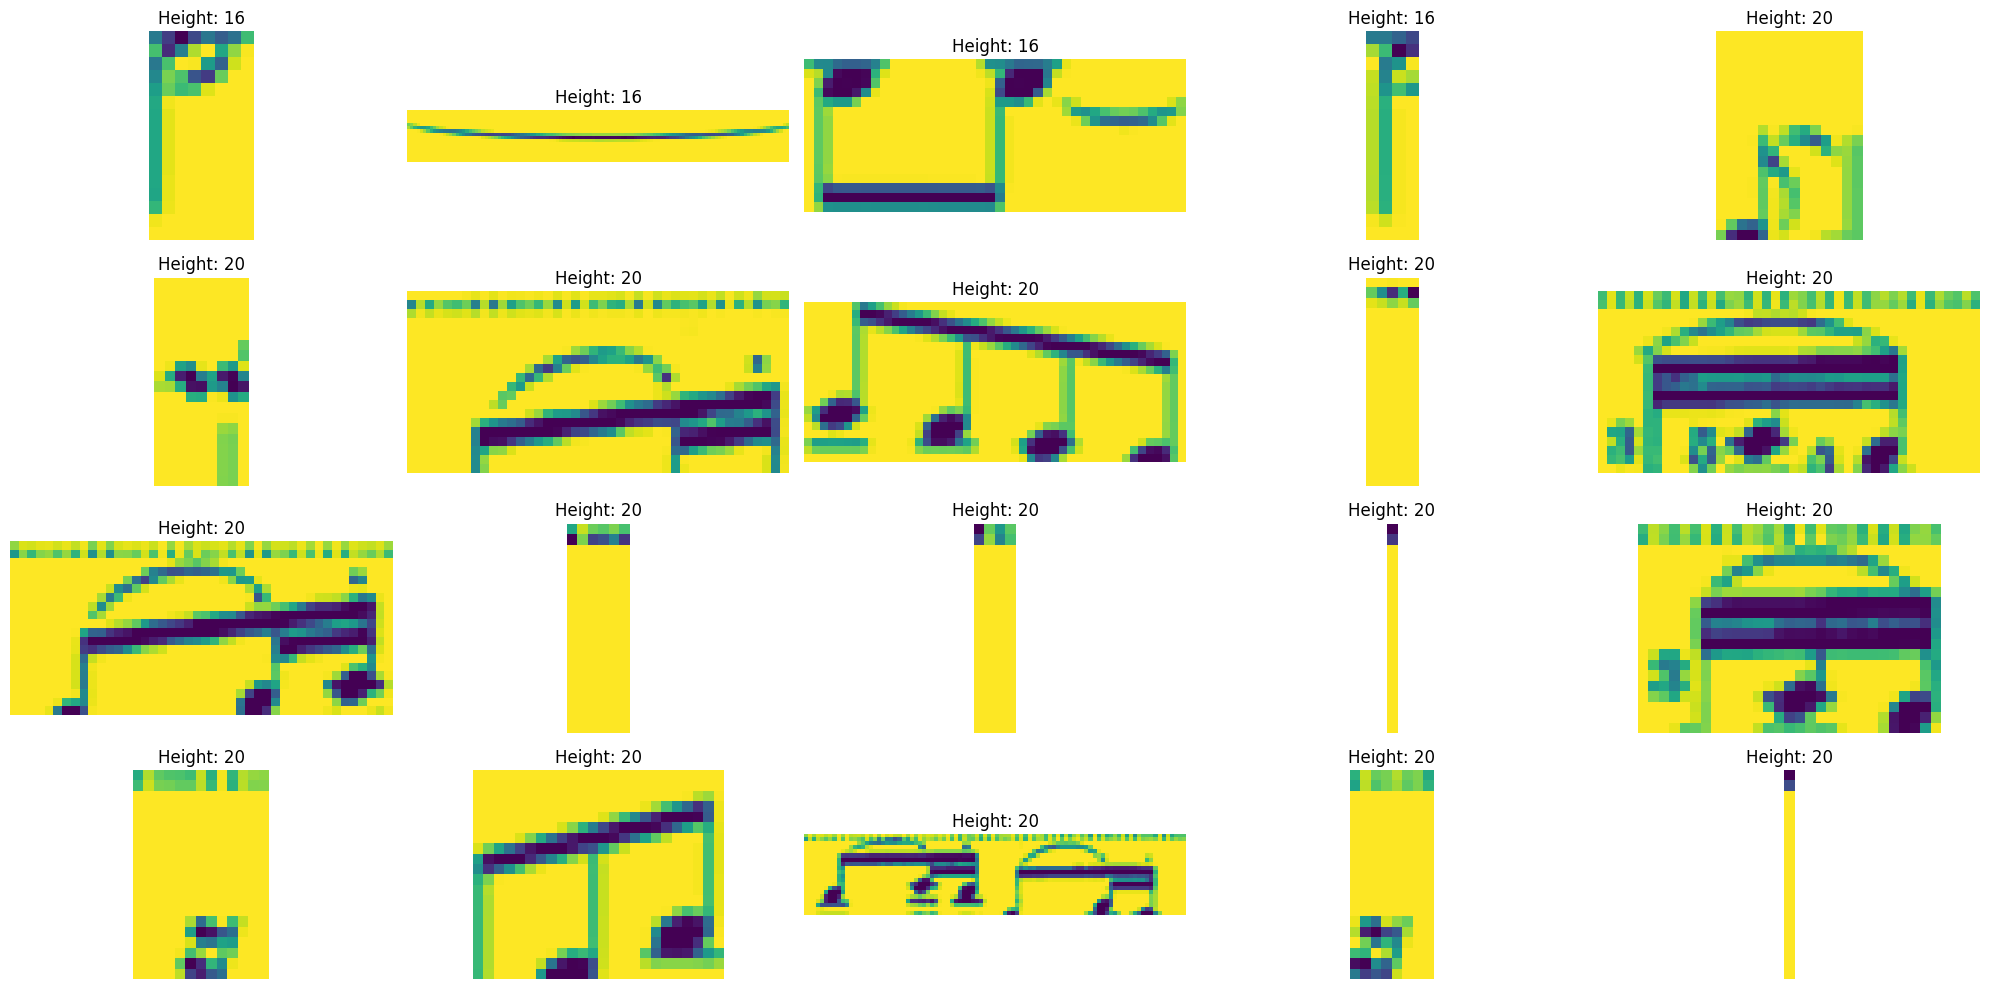

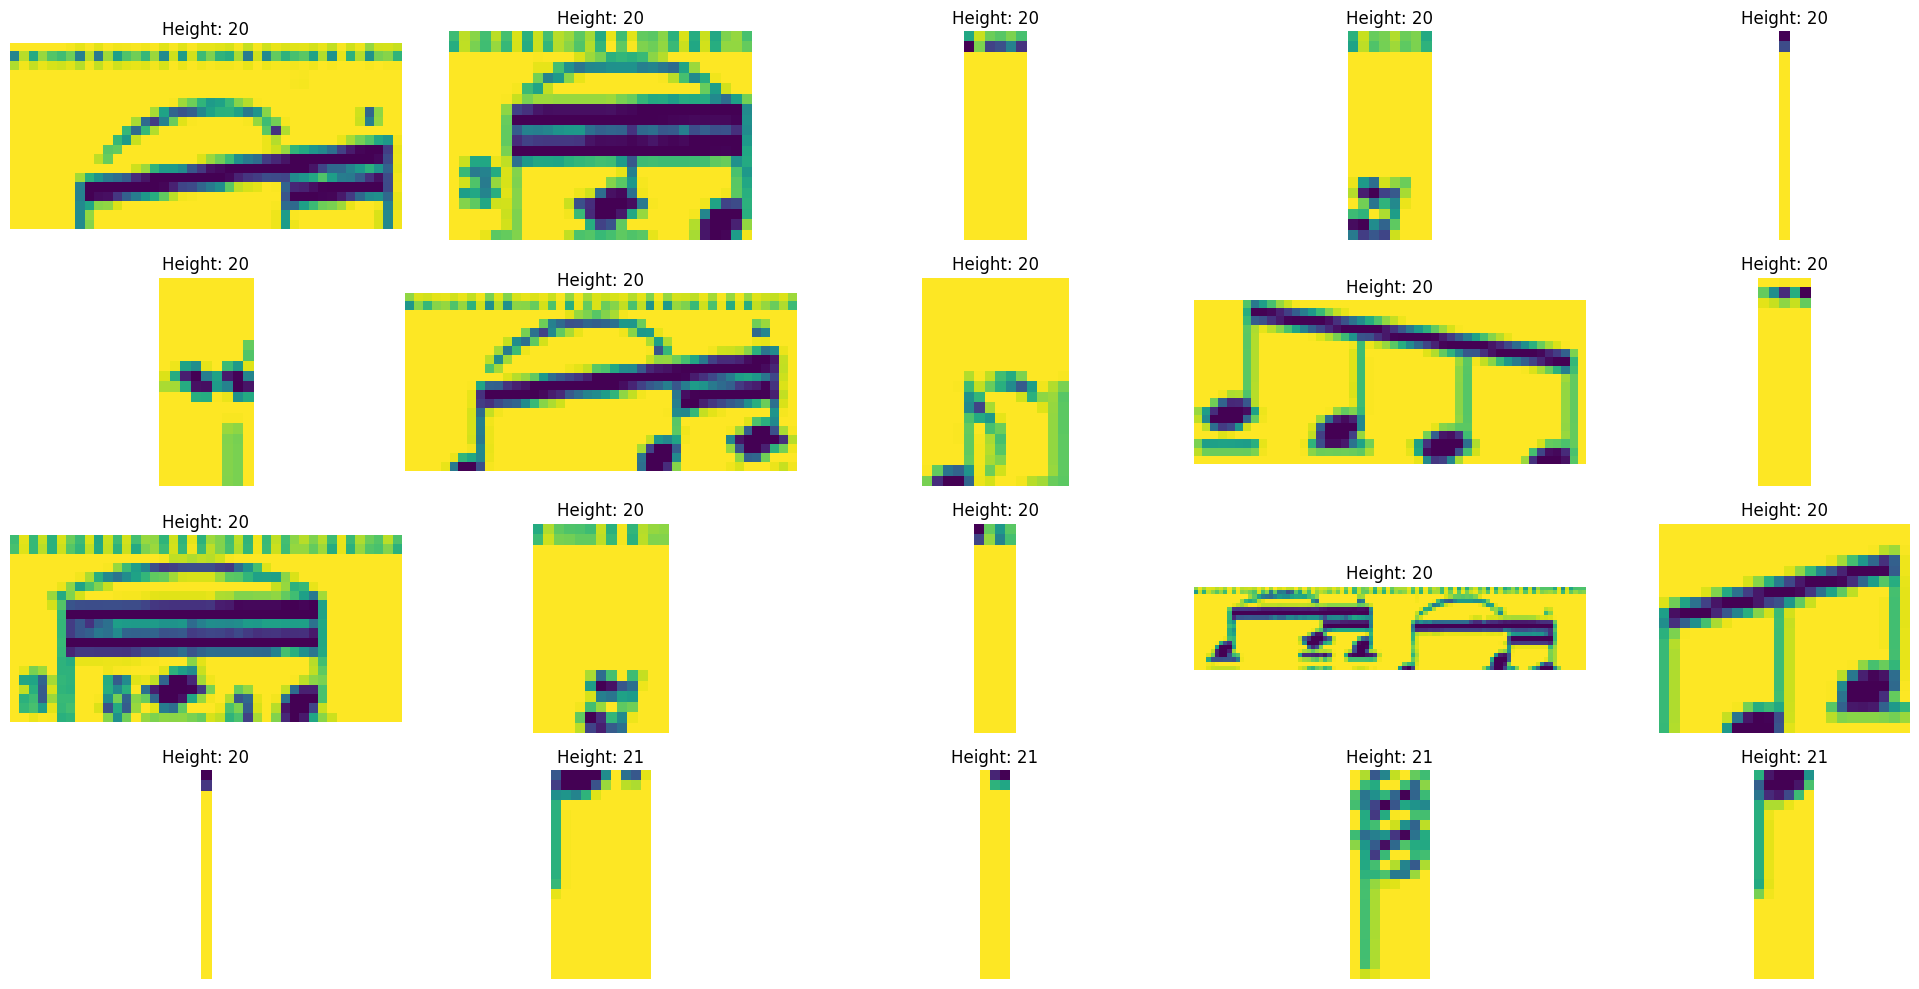

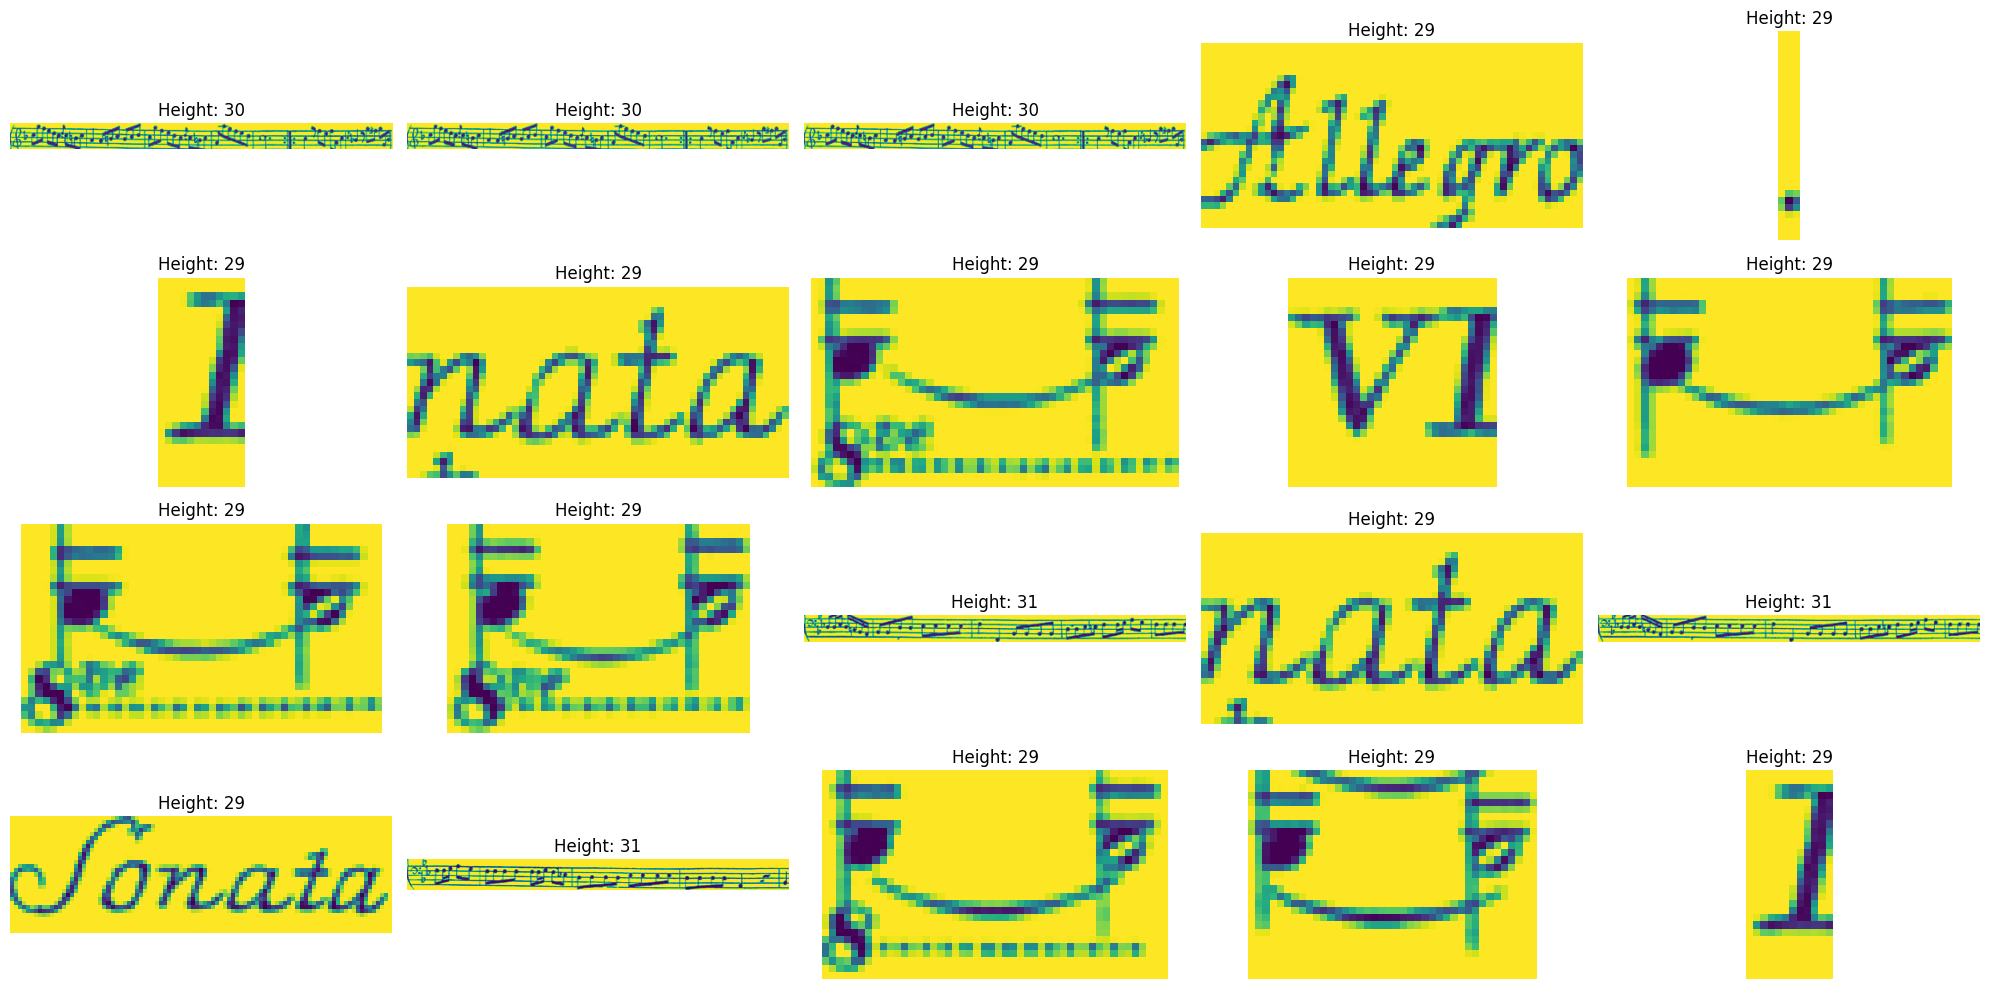

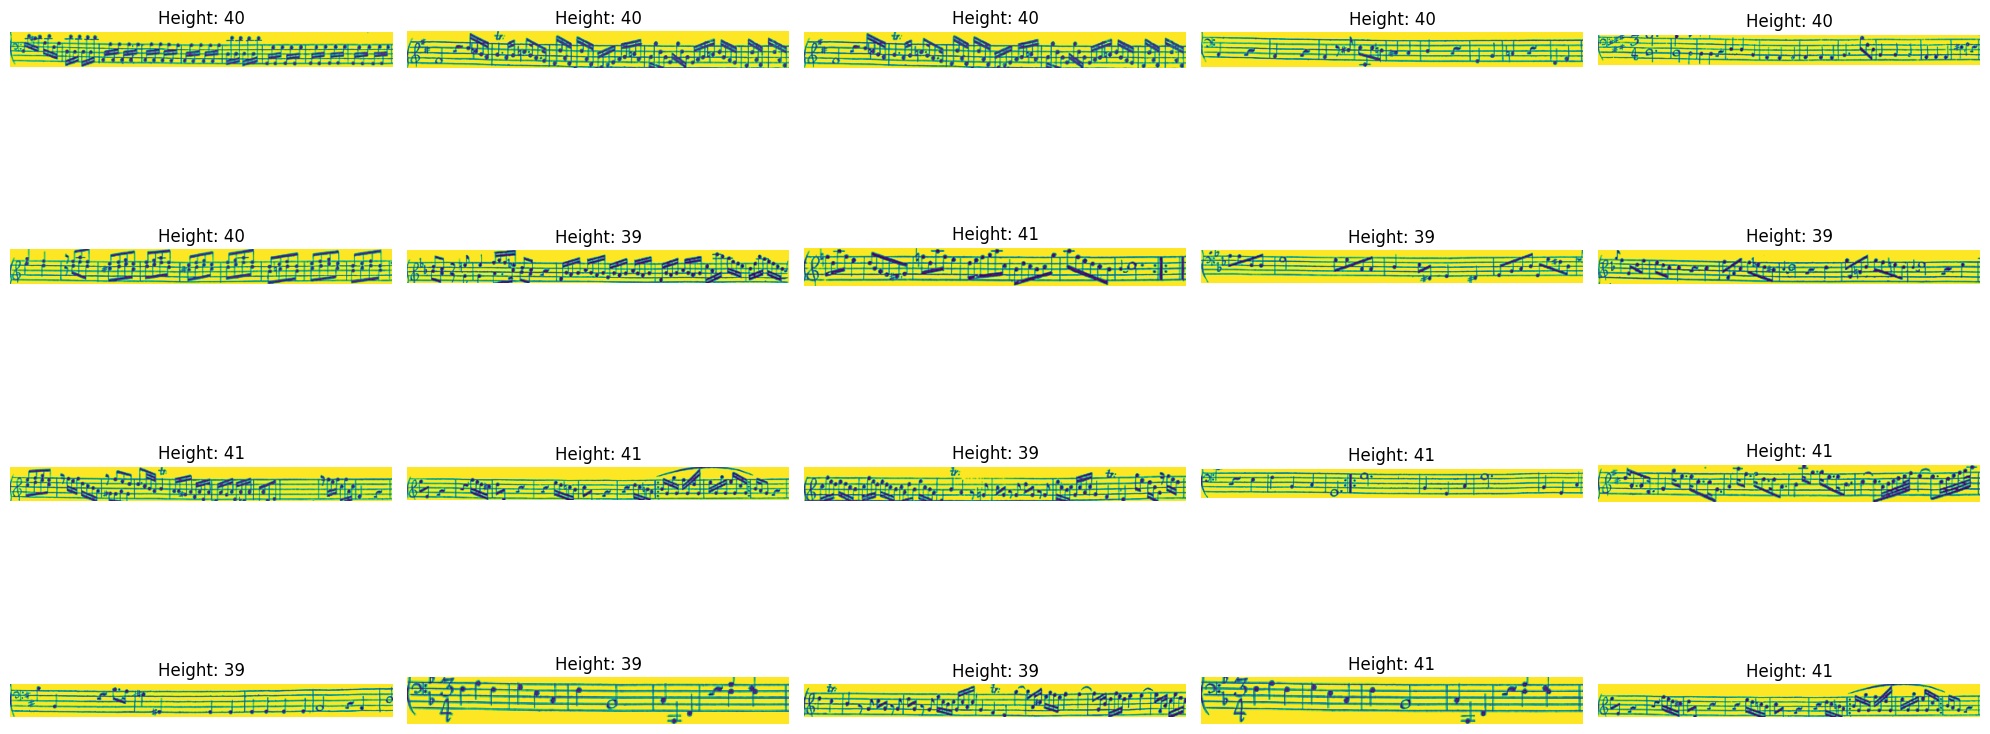

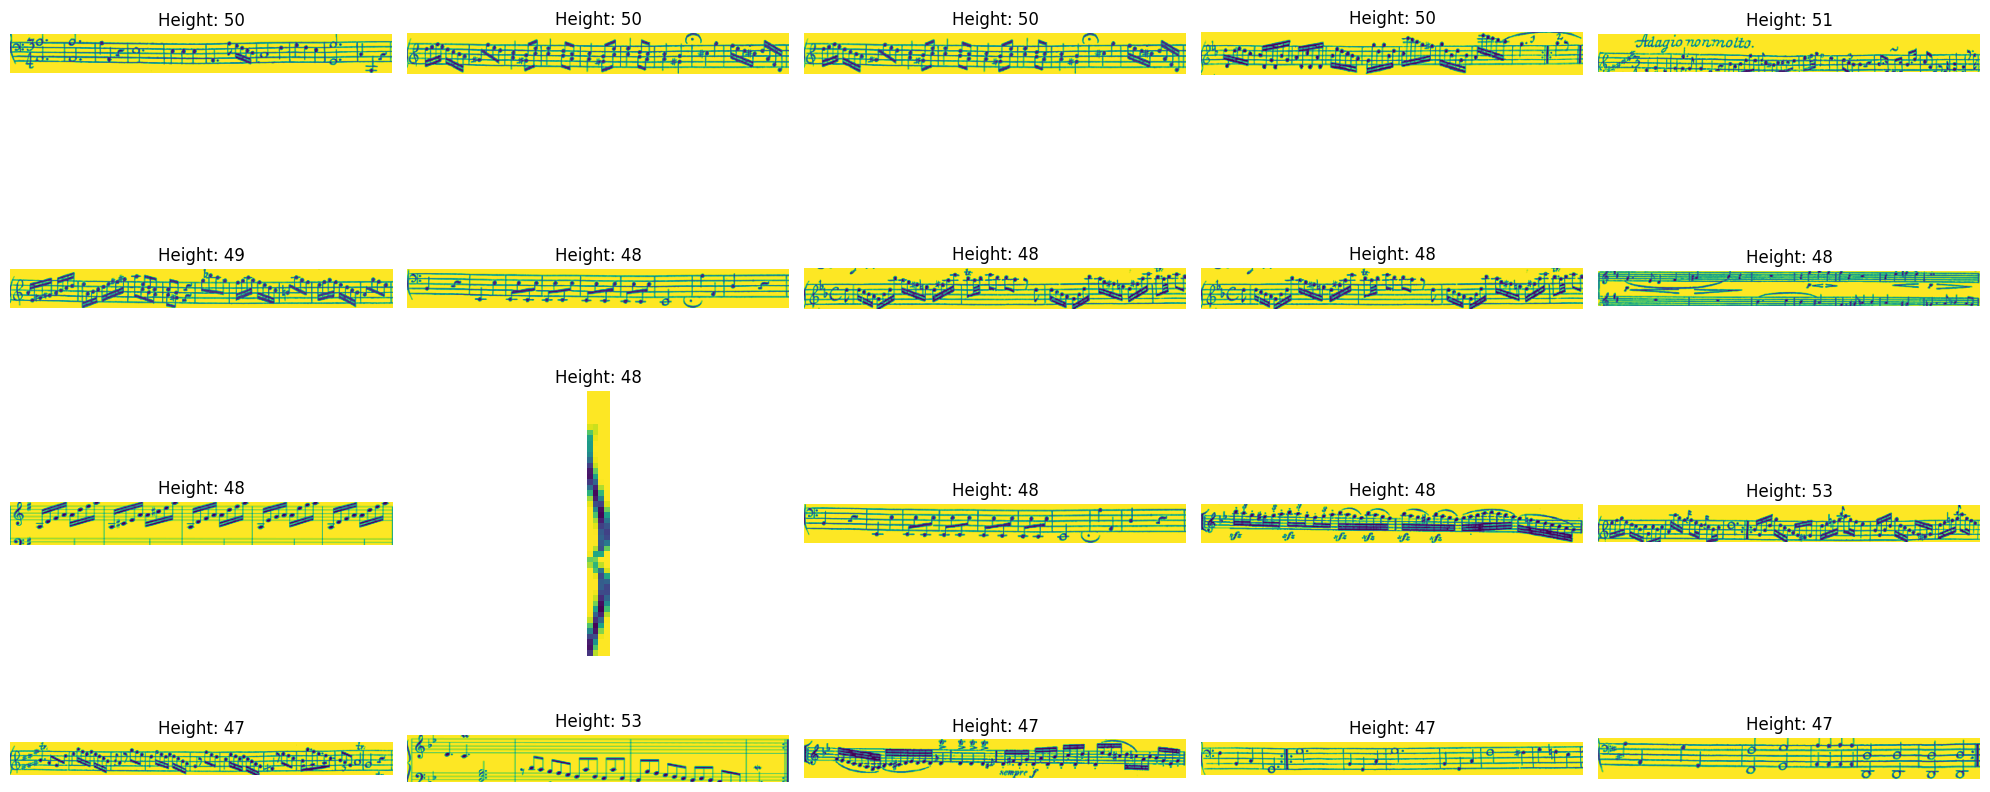

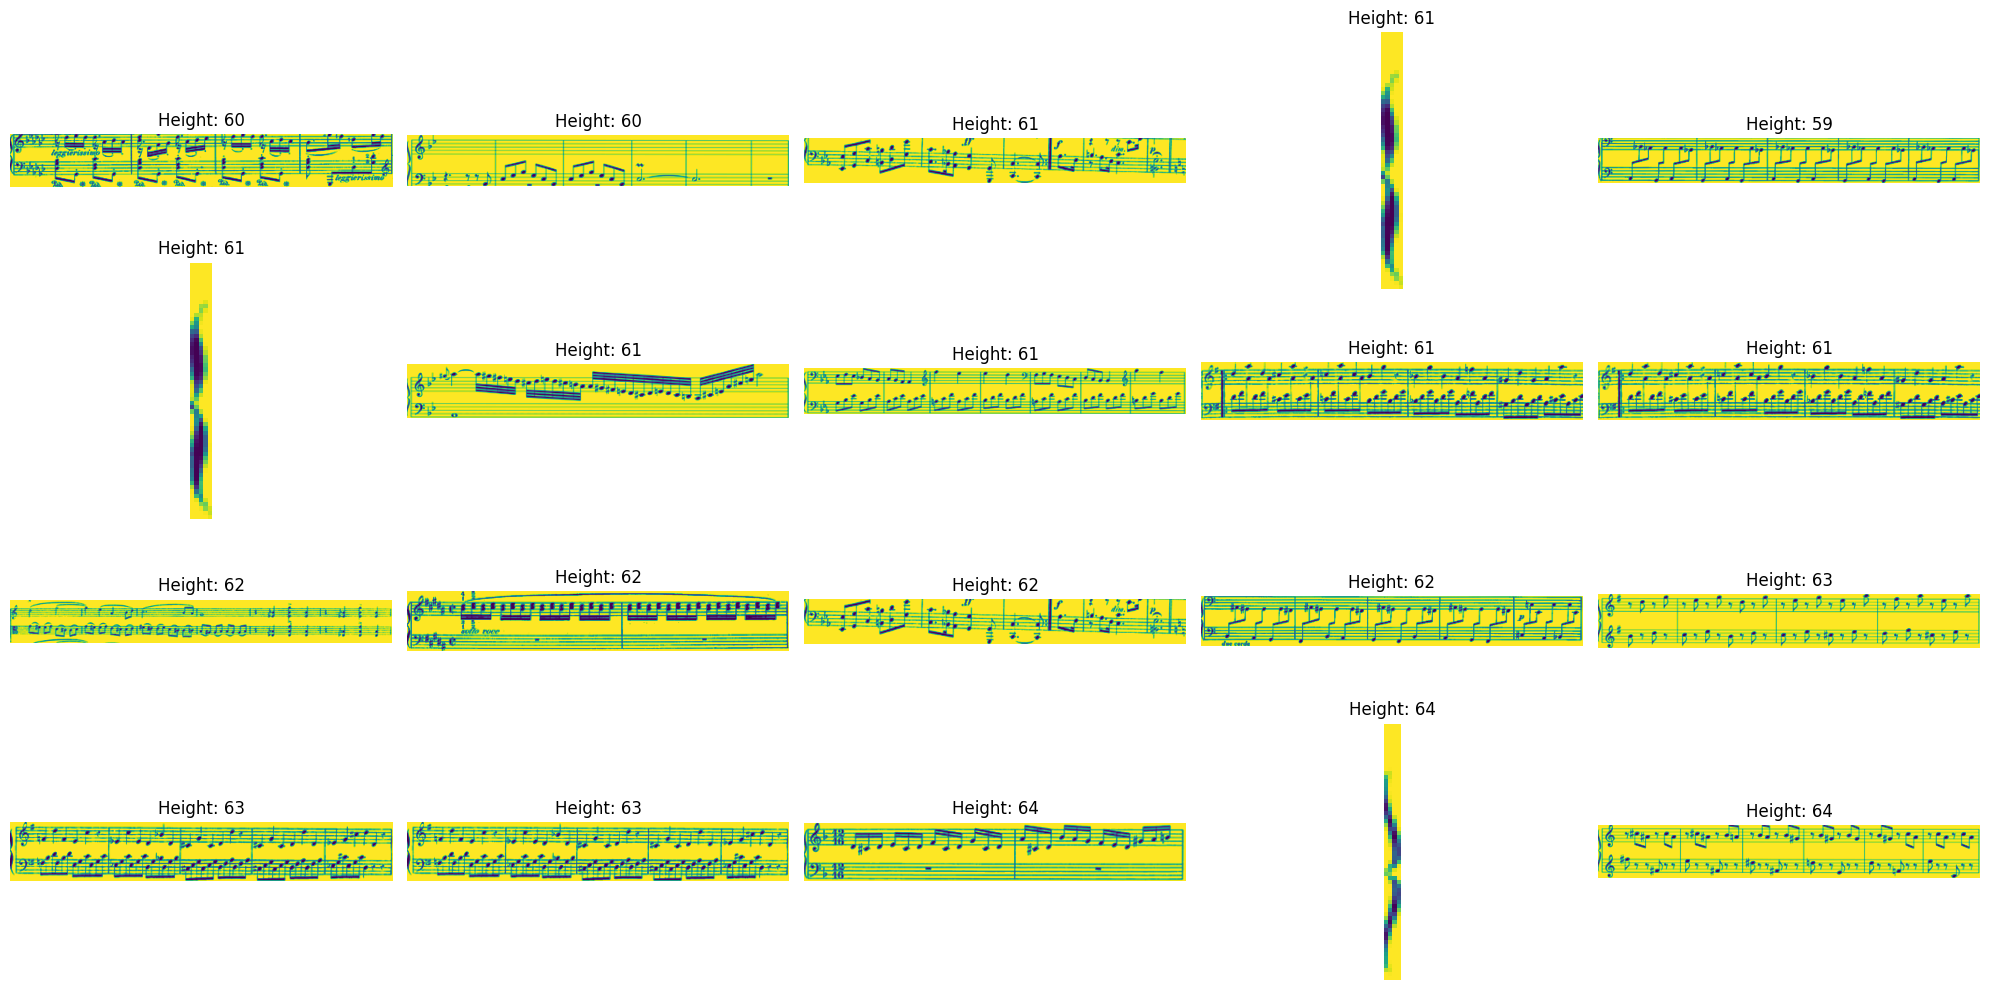

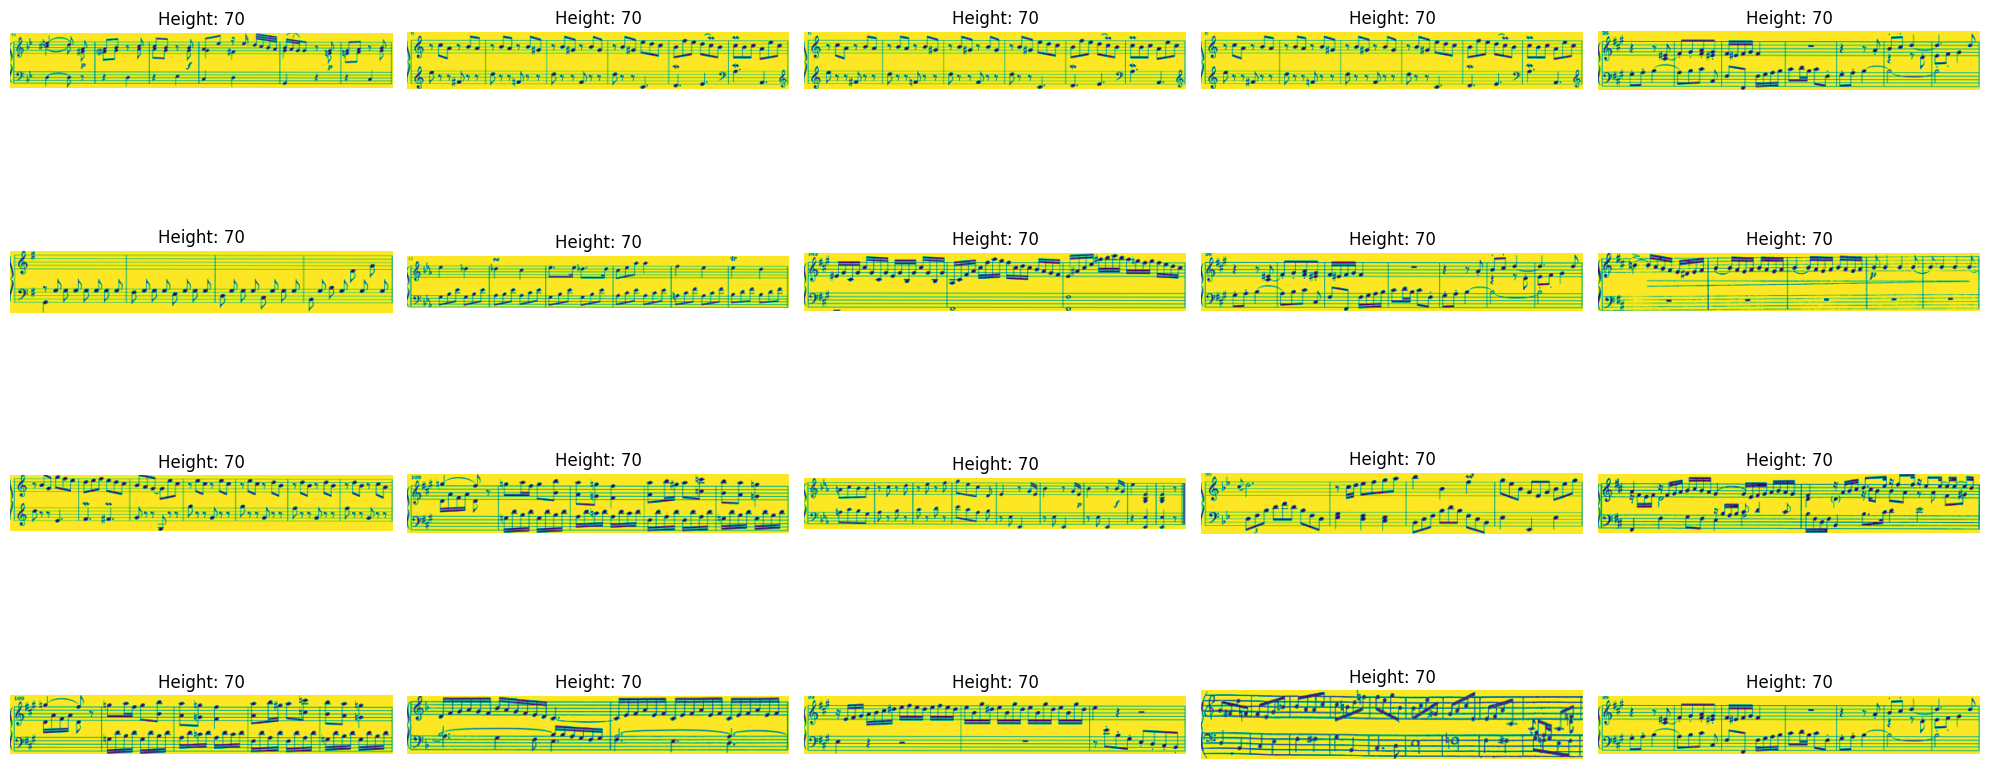

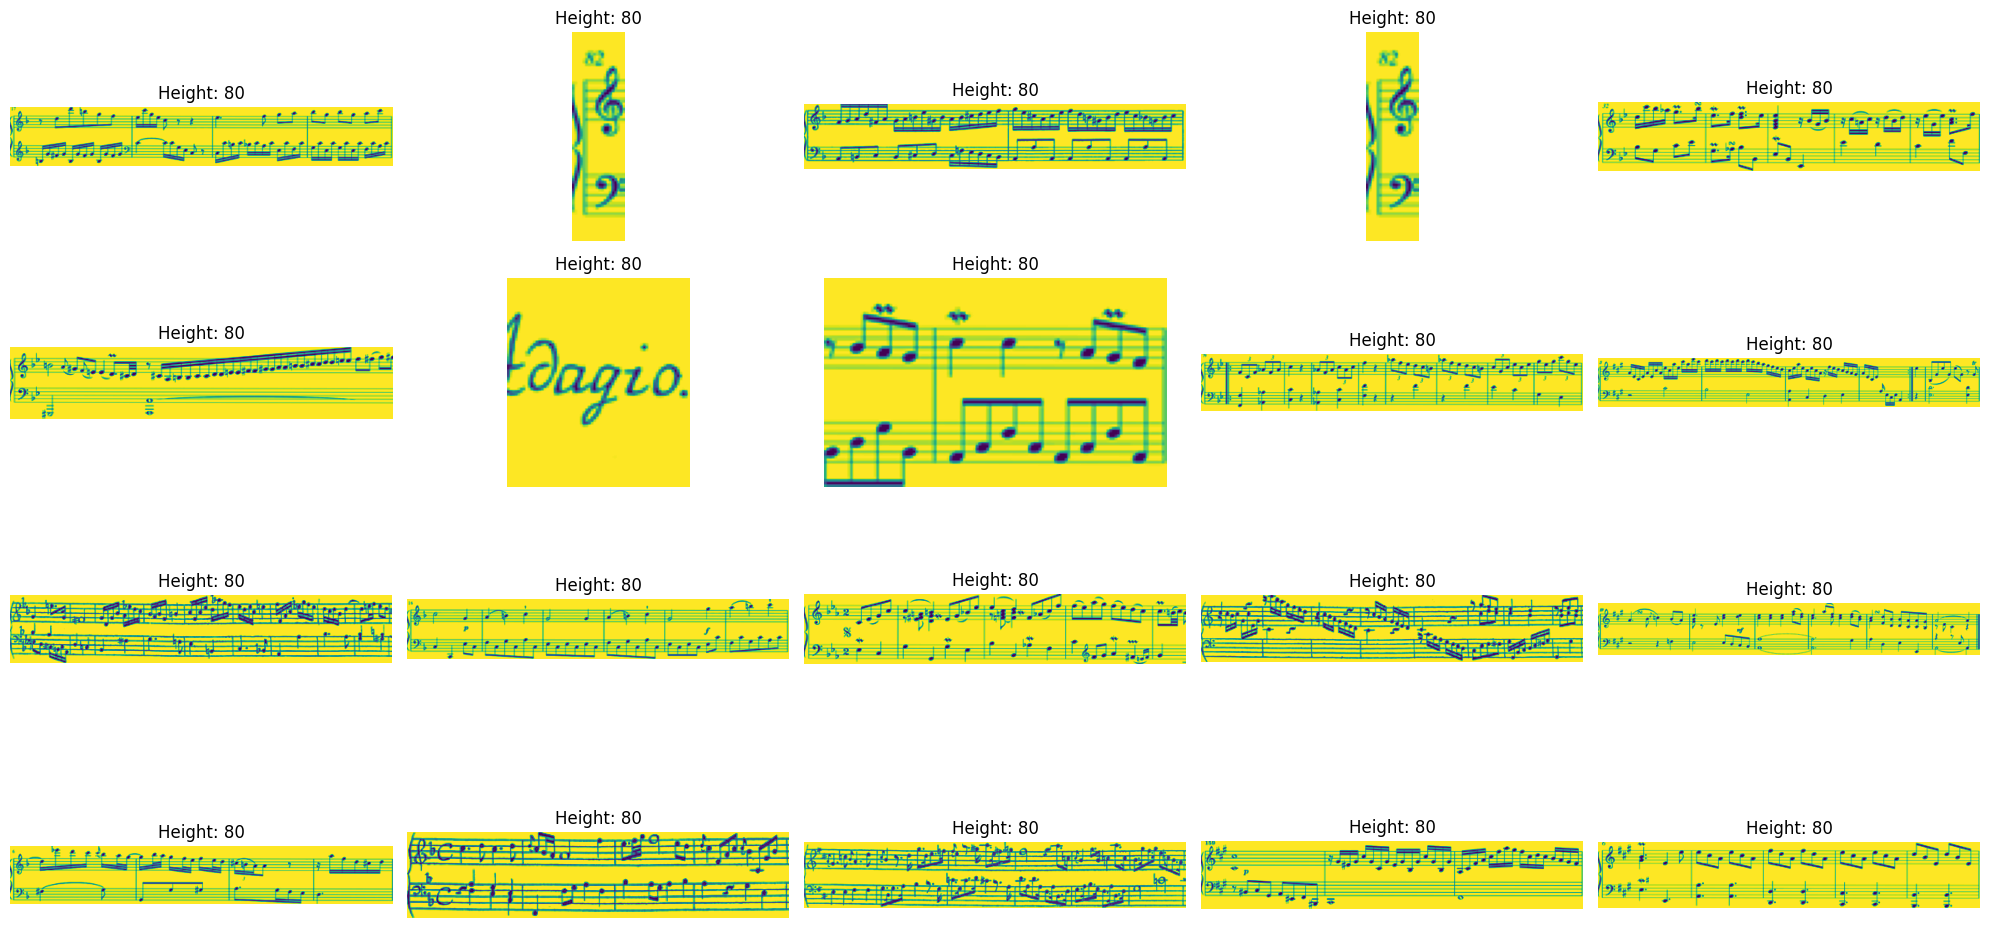

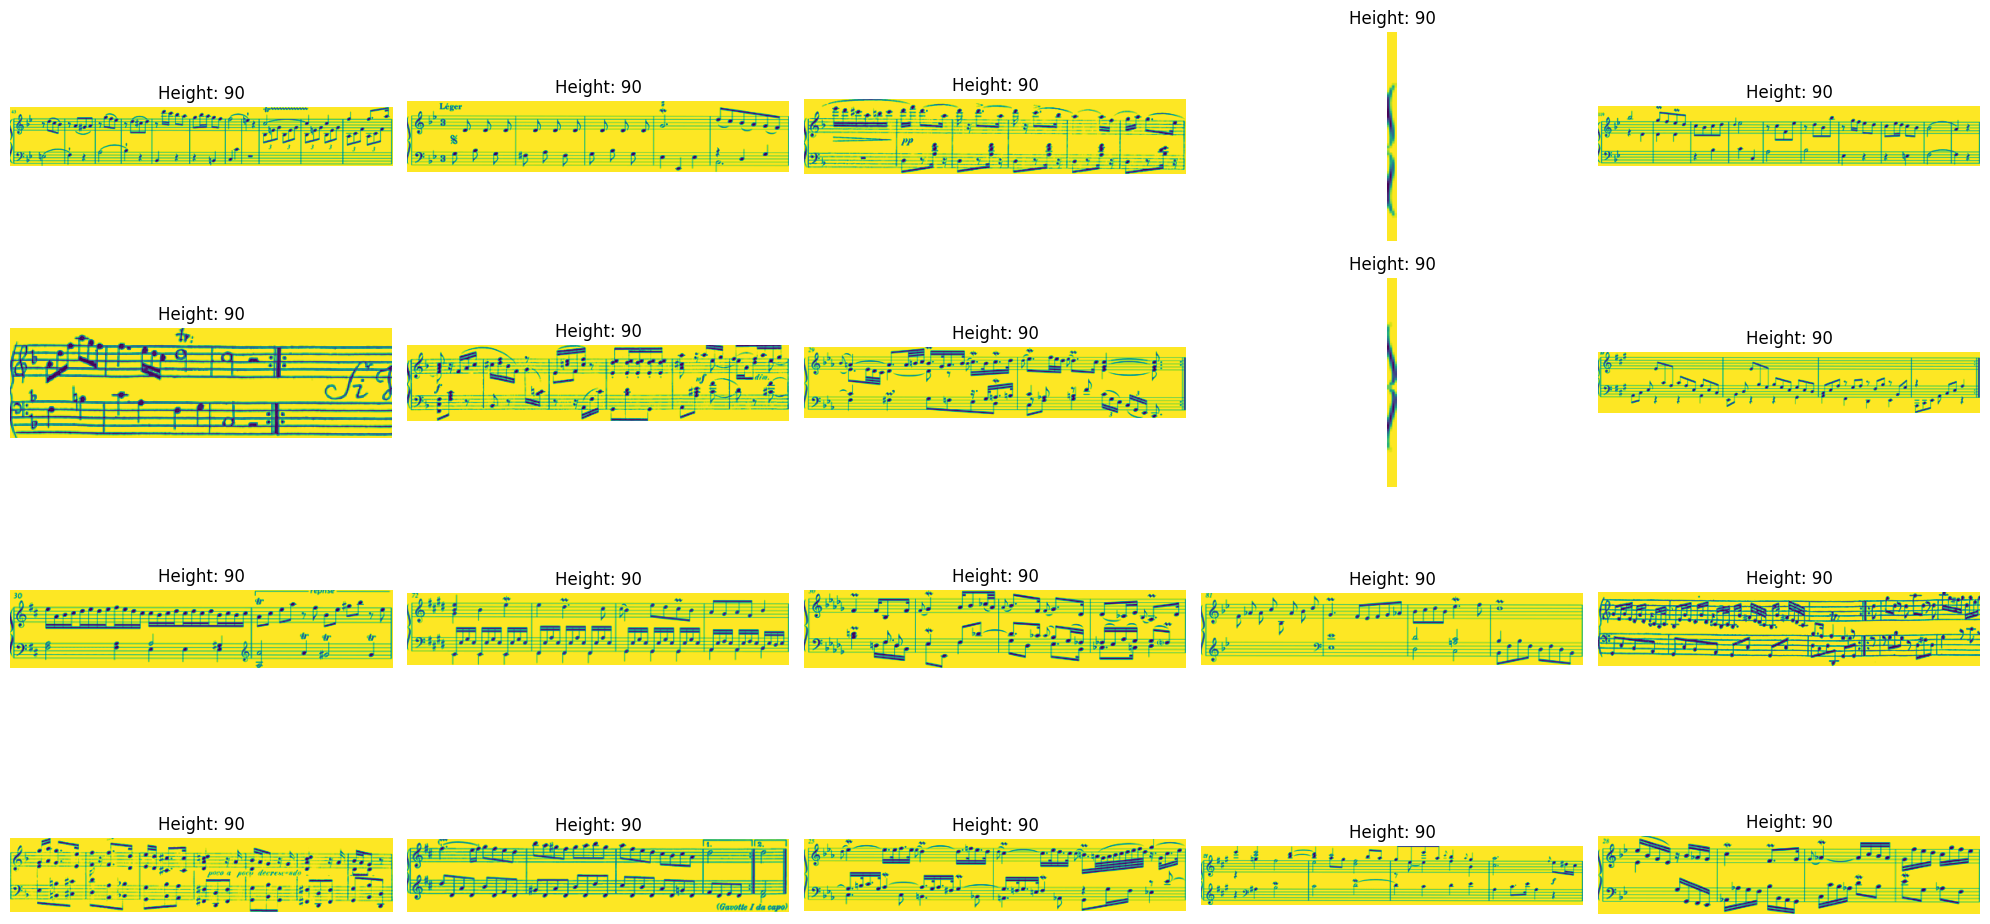

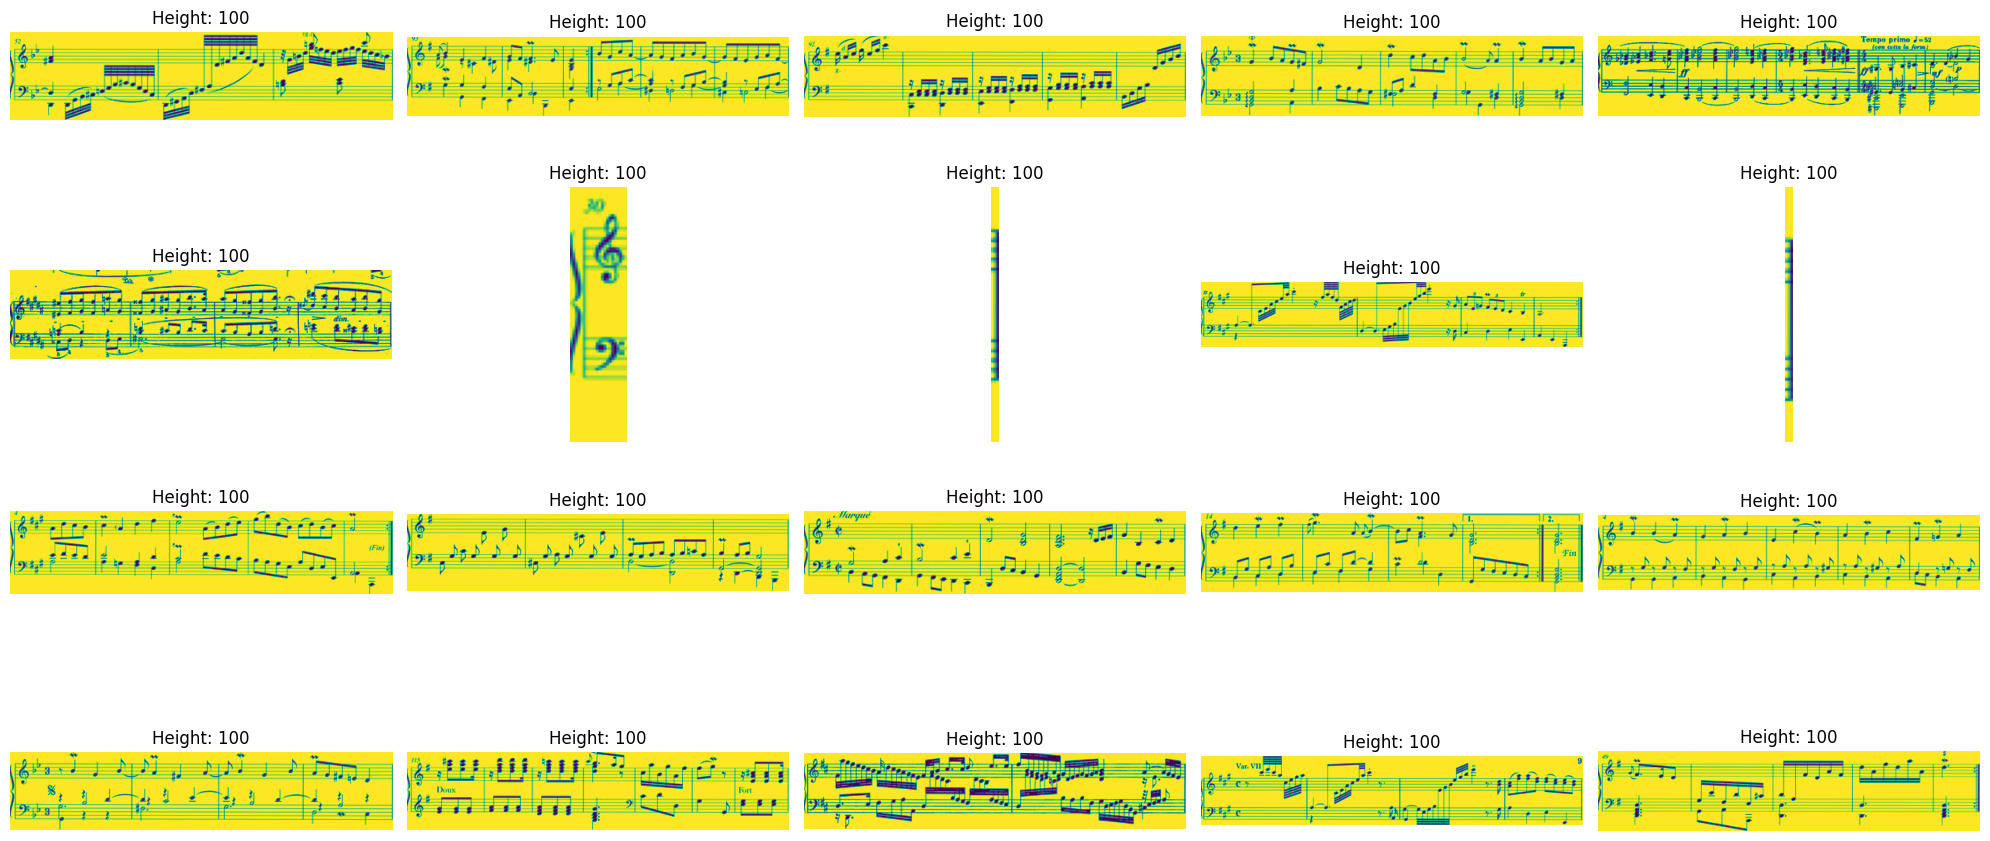

In [15]:
for target_height in [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]:
  # Find indices of images with heights closest to target
  height_diffs = np.abs(heights - target_height)
  mid_indices = np.argsort(height_diffs)[:20]

  # Get paths of images with heights around target
  mid_paths = [img_paths[i] for i in mid_indices]

  # Create figure to display images
  fig = plt.figure(figsize=(20, 10))
  for i, img_path in enumerate(mid_paths, 1):
    img = Image.open(img_path)
    plt.subplot(4, 5, i)
    plt.imshow(img)
    plt.title(f"Height: {img.height}")
    plt.axis('off')

  plt.tight_layout()
  plt.show()
